# Face Expression Recognition - CNN (Convolutional Neural Network)

* https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset kullanılmıştır.
* Bu kod, duygusal ifade tanıma veri setinden yüz ifadelerini içeren görüntüleri yükleyip görselleştirmek için kullanılır. 
* İlk olarak, resimlerin boyutu 48x48 piksel olarak belirlenir ve resimlerin bulunduğu temel dizin yolu tanımlanır. 
* Ardından, her biri farklı bir duyguyu temsil eden klasörlerin olduğu eğitim dizininde döngü oluşturulur. 
* Her bir duygu klasörü için, klasördeki 5 örnek resim yüklenir ve görselleştirilir.

2024-03-01 10:47:49.514891: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-01 10:47:49.514944: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-01 10:47:49.515760: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


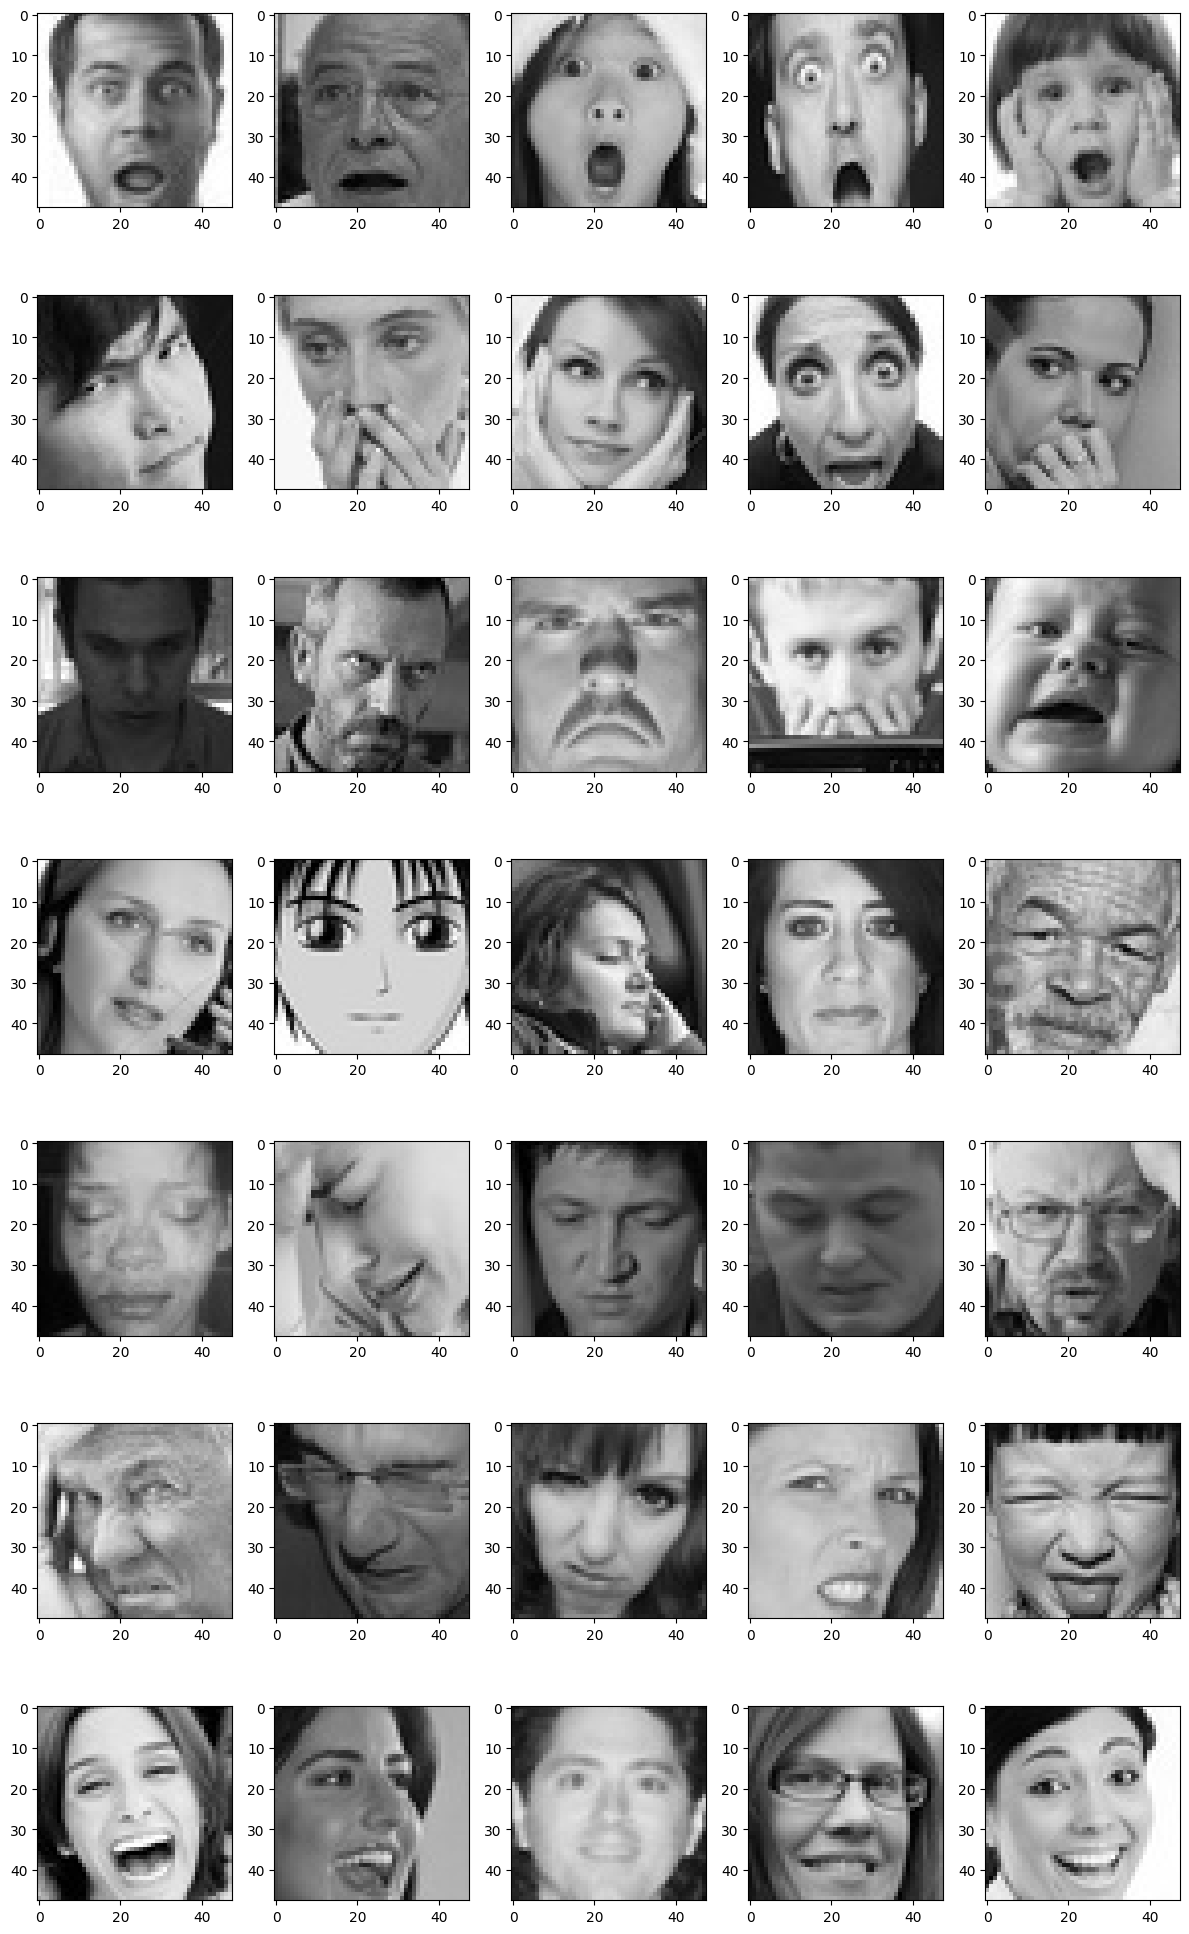

In [1]:
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

# Define the size of the images: 48*48 pixels
pic_size = 48

# Define the base path where the images are located
base_path = "/kaggle/input/face-expression-recognition-dataset/images/"

# Create a new matplotlib figure with a specified size
plt.figure(0, figsize=(12,20))

# Initialize a counter to keep track of the number of images displayed
cpt = 0

# Loop through each expression folder in the training directory
for expression in os.listdir(base_path + "train/"):
    
    # For each expression, display 5 sample images
    for i in range(1, 6):
        
        # Increment the counter
        cpt = cpt + 1
        
        # Create a subplot within the figure grid
        plt.subplot(7, 5, cpt)
        
        # Load and display the image
        # Load the image using load_img function from Keras
        # Adjust the image size to 48x48 pixels
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        
        # Display the image using imshow function from matplotlib
        plt.imshow(img, cmap="gray")

# Adjust the layout of the subplots to prevent overlap
plt.tight_layout()

# Show the plot containing the sample images
plt.show()

* Bu kod, eğitim dizinindeki her duygu klasöründe bulunan görüntülerin sayısını sayar ve her duygu kategorisi için bu sayıyı ekrana yazdırır.

In [2]:
# Iterate over each expression folder in the training directory
for expression in os.listdir(base_path + "train"):
    # Count the number of images available for each expression and print
    # The len(os.listdir()) function counts the number of files (images) in each expression folder
    # The expression variable represents the name of the expression category
    # The printed output includes the count of images, followed by the expression label and the term "images"
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")

3205 surprise images
4103 fear images
3993 angry images
4982 neutral images
4938 sad images
436 disgust images
7164 happy images


* Bu kod, veri artırma işlemleri yapılarak eğitim ve doğrulama veri kümeleri için veri üreticileri oluşturur.

* ImageDataGenerator sınıfı, veri artırma işlemleri için kullanılır. Ancak, bu örnekte veri artırma yapılmadığı için, sınıf varsayılan parametrelerle oluşturulur.

* batch_size, her bir eğitim iterasyonunda ağa beslenecek görüntü sayısını belirler.

* train_generator ve validation_generator, eğitim ve doğrulama veri kümeleri için veri üreticilerini oluşturmak için flow_from_directory yöntemini kullanır. Her iki veri üreticisi de belirtilen dizinlerden görüntüleri okur ve istenen boyuta yeniden boyutlandırır. Ayrıca, gri ölçekli olarak okunur ve belirtilen batch_size ile gruplanır. Sınıf modu "categorical" olarak ayarlanır, çünkü etiketler one-hot kodlaması biçimindedir. shuffle parametresi eğitim veri üreticisi için True, doğrulama veri üreticisi için False olarak ayarlanır, çünkü eğitim sırasında eğitim verilerinin karıştırılması önemlidir, ancak doğrulama sırasında karıştırma gerekli değildir.

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Number of images to feed into the neural network for every batch
batch_size = 128

# Data augmentation for training images
datagen_train = ImageDataGenerator()
# Data augmentation for validation images
datagen_validation = ImageDataGenerator()

# Generator for training data
train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

# Generator for validation data
validation_generator = datagen_validation.flow_from_directory(base_path + "validation",
                                                              target_size=(pic_size,pic_size),
                                                              color_mode="grayscale",
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


* Bu kod ile, derin öğrenme modeli oluşturulur ve eğitim için hazır hale getirilir.

* Sequential modeli, katmanlar ardışık bir şekilde eklenerek oluşturulur. Bu modelin içine, ardışık katmanlar eklenecek.

* İlk katman, 3x3 boyutunda 64 adet filtreyle birlikte 48x48 boyutundaki giriş görüntülerini işlemek için bir Convolutional Neural Network (CNN) katmanı ekler. Ardından, ağın stabilitesini artırmak için Batch Normalization uygulanır ve ardından ReLU aktivasyon fonksiyonu uygulanır. Max pooling ile boyutu küçültülür ve aşırı uyumu azaltmak için Dropout uygulanır.

* İkinci katman, 5x5 boyutunda 128 adet filtreyle birlikte bir Convolutional Neural Network (CNN) katmanı ekler. Aynı şekilde, Batch Normalization, ReLU aktivasyon fonksiyonu, Max pooling ve Dropout katmanları uygulanır.

* Üçüncü ve dördüncü katmanlar da benzer şekilde eklenir.

* CNN katmanlarının çıktısını düzleştirilmiş bir vektöre dönüştürmek için Flatten katmanı eklenir.

* Düzleştirilmiş çıktı, 256 nöronlu bir yoğun (fully connected) katmana iletilir. Batch Normalization, ReLU aktivasyon fonksiyonu ve Dropout katmanları uygulanır.

* Ardından, 512 nöronlu bir başka yoğun (fully connected) katman eklenir ve aynı şekilde Batch Normalization, ReLU aktivasyon fonksiyonu ve Dropout katmanları uygulanır.

* Son katman, sınıflandırma yapmak için çıkış katmanıdır. Çıkış katmanında, olası sınıf etiketlerinin sayısına (7 sınıf var) karşılık gelen bir sayıda nöron bulunur ve çıkış olarak softmax aktivasyon fonksiyonu uygulanır.

* Model, Adam optimizer ile derlenir. Kayıp fonksiyonu olarak categorical crossentropy ve metrik olarak doğruluk (accuracy) kullanılır.

In [4]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 7

# Initializing the CNN model
model = Sequential()

# 1st Convolution layer
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening the output of the convolutional layers
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Output layer with softmax activation for multi-class classification
model.add(Dense(nb_classes, activation='softmax'))

# Adam optimizer with a learning rate of 0.0001 is used
opt = Adam(learning_rate=0.0001)
# Model is compiled with categorical crossentropy loss and accuracy metric
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


* Bu kod, modeli belirtilen sayıda epoch boyunca eğitir ve en iyi doğrulama doğruluğuna sahip model ağırlıklarını kaydeder.

* %%time ifadesi, kodun çalışma süresini ölçmek için kullanılır. Bu ifadenin bulunduğu hücrenin çalıştırılması, bu hücrenin çalışma süresini rapor eder.

* epochs değişkeni, eğitim döngüsünün kaç kez tamamlanacağını belirtir. Burada 50 olarak ayarlanmış.

* from keras.callbacks import ModelCheckpoint ifadesi, ModelCheckpoint geri çağırma işlevini içeri aktarır. Bu geri çağırma, eğitim sırasında en iyi model ağırlıklarını kaydetmek için kullanılacak.

* ModelCheckpoint geri çağırması, en iyi model ağırlıklarını kaydetmek için kullanılır. val_acc (doğrulama doğruluğu) metriğini izler ve en yüksek değer görüldüğünde model ağırlıklarını kaydeder.

* callbacks_list listesi, ModelCheckpoint geri çağırmasını içerir. Bu geri çağırma, fit() yöntemi tarafından çağrıldığında kullanılır.

* fit() yöntemi, modeli eğitim verileri üzerinde eğitmek için kullanılır. Bu yöntem, eğitim verileri üreteçleri ve diğer eğitim parametreleri ile birlikte çağrılır. Bu parametreler arasında epoch sayısı, her bir epoch için adım sayısı, doğrulama verileri ve geri çağırma listesi bulunur.

In [5]:
%%time

# Number of epochs to train the neural network
epochs = 50

from keras.callbacks import ModelCheckpoint

# ModelCheckpoint callback to save the best model weights during training
checkpoint = ModelCheckpoint("model_weights.keras", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Training the model using the fit() method
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.n//train_generator.batch_size,
                    epochs=epochs,
                    validation_data = validation_generator,
                    validation_steps = validation_generator.n//validation_generator.batch_size,
                    callbacks=callbacks_list
                    )

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 525s 2s/step - accuracy: 0.2079 - loss: 2.1238 - val_accuracy: 0.3158 - val_loss: 1.7167
Epoch 2/50


/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_acc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


  1/225 ━━━━━━━━━━━━━━━━━━━━ 7:51 2s/step - accuracy: 0.2734 - loss: 1.8911

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2734 - loss: 0.9498 - val_accuracy: 0.1154 - val_loss: 1.1171
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 544s 2s/step - accuracy: 0.2936 - loss: 1.8461 - val_accuracy: 0.3575 - val_loss: 1.6600
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - accuracy: 0.3281 - loss: 0.9318 - val_accuracy: 0.2692 - val_loss: 1.1760
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 509s 2s/step - accuracy: 0.3347 - loss: 1.7238 - val_accuracy: 0.3902 - val_loss: 1.5960
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 15s 57ms/step - accuracy: 0.3906 - loss: 0.8447 - val_accuracy: 0.3846 - val_loss: 1.0468
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 508s 2s/step - accuracy: 0.3633 - loss: 1.6461 - val_accuracy: 0.4077 - val_loss: 1.5487
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 15s 57ms/step - accuracy: 0.4062 - loss: 0.8275 - val_accuracy: 0.4231 - val_loss: 1.0180
Epoch 9/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 507s 2s/step - accuracy: 0.3881 - loss: 1.5830 - val_accuracy: 0.

* model.save("FER_model.h5") ifadesi, eğitilmiş modeli "FER_model.h5" adlı bir dosyaya kaydeder. Bu dosya, modelin mimarisini, yapılandırmasını ve ağırlıklarını içerir. Bu sayede, model daha sonra yüklenerek tahminlerde bulunmak veya daha fazla eğitim için kullanılabilir.

* FER_model.h5, Flask ile geliştirilen bir gerçek zamanlı duygusal ifade tanıma uygulamasında kullanılan eğitilmiş bir model dosyasıdır. Bu model, insan yüzlerinden duygusal ifadeleri tanıyabilen derin öğrenme (CNN) algoritmasıyla eğitilmiştir. Flask uygulaması, kullanıcıların anlık görüntülerdeki (video, görüntü gibi) duygusal ifadeleri tahmin etmelerine olanak tanır. FER_model.h5 dosyası, bu tahminleri yapmak için uygulamaya entegre edilir.

In [15]:
from keras.models import load_model

# Saving the trained model to a file named "FER_model.h5"
model.save("FER_model.h5")

* Bu kod, matplotlib kütüphanesini kullanarak iki alt grafikten oluşan bir şekil oluşturur. 

* İlk alt grafik, eğitim ve doğrulama kayıplarını (loss) gösterirken, ikinci alt grafik eğitim ve doğrulama doğruluklarını (accuracy) gösterir. 

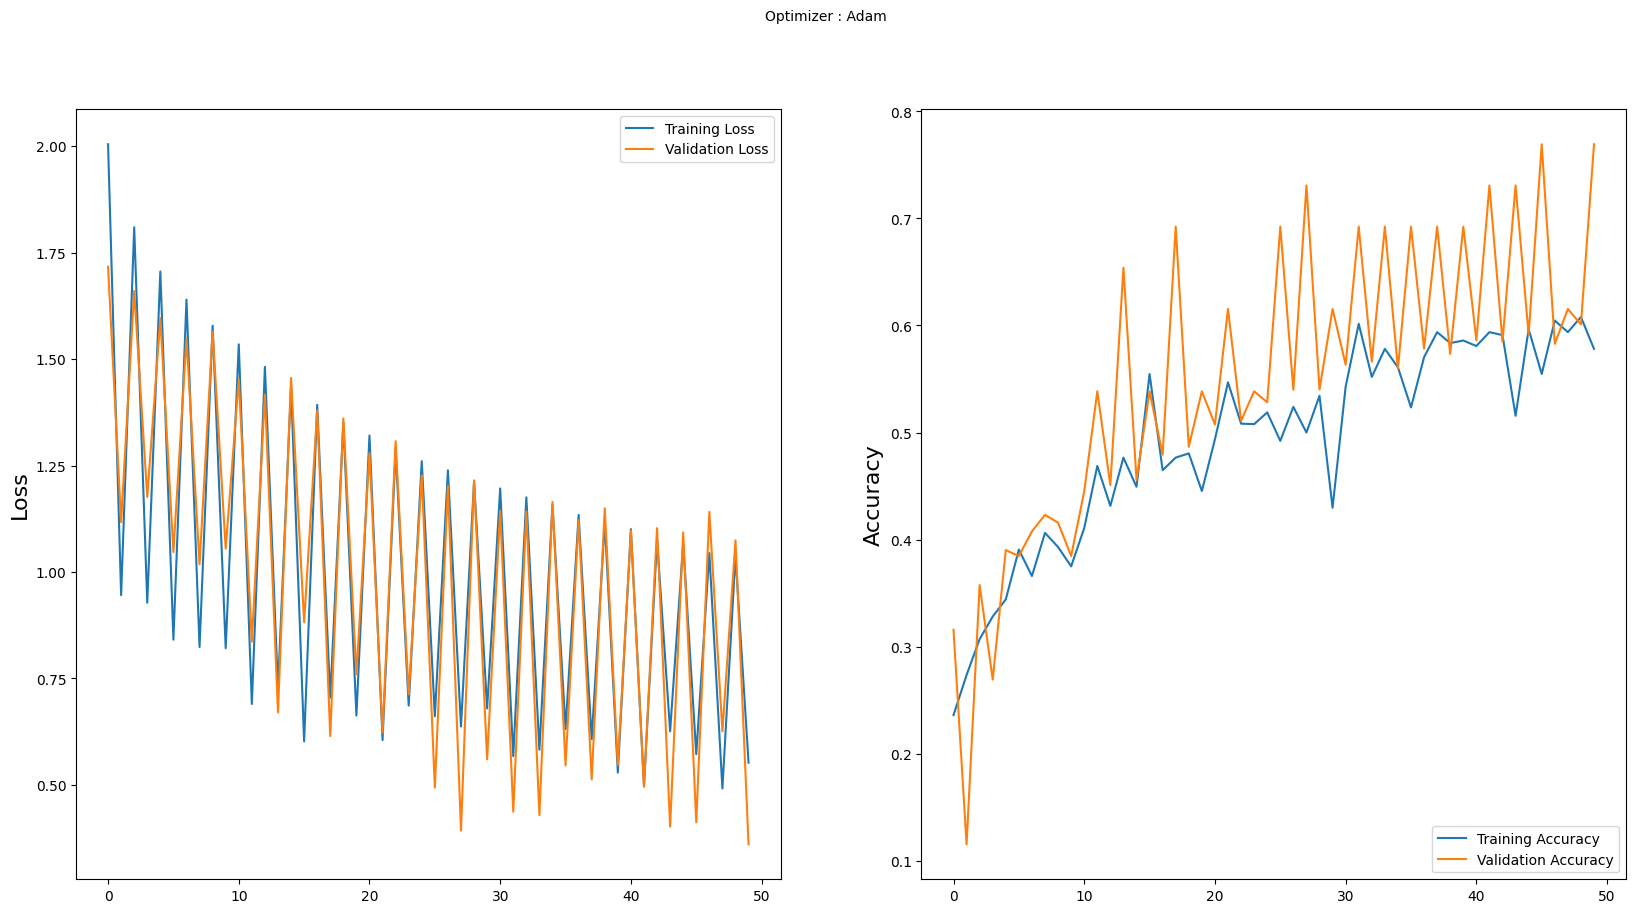

In [7]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
plt.figure(figsize=(20,10))

# Subplot for loss values
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)  # Title for the whole figure
plt.ylabel('Loss', fontsize=16)  # Label for the y-axis
plt.plot(history.history['loss'], label='Training Loss')  # Plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss
plt.legend(loc='upper right')  # Add legend to the upper right corner

# Subplot for accuracy values
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)  # Label for the y-axis
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy
plt.legend(loc='lower right')  # Add legend to the lower right corner

# Display the plot
plt.show()